In [147]:
import pandas as pd
import numpy as np
data = pd.read_excel('Data.xlsx')
csv_data = data.to_csv('salesData.csv', index=False,encoding='utf-8-sig')
df = pd.read_csv('salesData.csv')
df 
# print("تعداد ردیف‌های دیتافریم:", len(df))

,InvoiceID,CompanyRef,CurrencyRef,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,...,ProductRef,Quantity,MajorUnitQuantity,InitialQuantity,PriceBaseFee,Fee,Price,DeliveryAddressRef,SalesArea,RegionalDivision
0,62,1,1,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,...,613,1.0,1.0,1.0,9.500000e+07,9.500000e+07,9.500000e+07,NaN,تک فروشی,بروجرد
1,62,1,1,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,...,613,1.0,1.0,1.0,9.500000e+07,9.500000e+07,9.500000e+07,NaN,تک فروشی,بروجرد
2,64,1,1,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,...,937,4.0,4.0,4.0,4.375000e+09,4.375000e+09,1.750000e+10,NaN,تک فروشی,تهران
3,64,1,1,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,...,937,4.0,4.0,4.0,4.375000e+09,4.375000e+09,1.750000e+10,NaN,تک فروشی,تهران
4,67,1,1,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,...,22545,1.0,1.0,1.0,2.000000e+07,2.000000e+07,2.000000e+07,470.0,تک فروشی,تهران
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,48931,200.0,200.0,200.0,1.400000e+06,1.400000e+06,2.800000e+08,1960.0,خدمات پس از فروش,تهران
17092,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,49314,1.0,1.0,1.0,6.200000e+08,6.200000e+08,6.200000e+08,1960.0,خدمات پس از فروش,تهران
17093,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,49314,1.0,1.0,1.0,6.200000e+08,6.200000e+08,6.200000e+08,1960.0,خدمات پس از فروش,تهران
17094,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,49315,1.0,1.0,1.0,2.000000e+07,2.000000e+07,2.000000e+07,1960.0,خدمات پس از فروش,تهران


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17096 entries, 0 to 17095
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               17096 non-null  int64  
 1   CompanyRef              17096 non-null  int64  
 2   CurrencyRef             17096 non-null  int64  
 3   Number                  17096 non-null  int64  
 4   Date                    17096 non-null  object 
 5   CustomerRef             17096 non-null  int64  
 6   BrokerRef               17096 non-null  int64  
 7   Creator                 17096 non-null  int64  
 8   PayerType               17096 non-null  int64  
 9   InvoicePrice            17096 non-null  float64
 10  InvoiceAdditionAmount   17096 non-null  float64
 11  InvoiceReductionAmount  17096 non-null  float64
 12  InvoiceNetPrice         17096 non-null  float64
 13  EffectiveNetPrice       17096 non-null  float64
 14  InvoiceStauts           17096 non-null

In [149]:
columns = ['CompanyRef','CurrencyRef','EffectiveNetPrice','MajorUnitQuantity',
           'InitialQuantity','PriceBaseFee','DeliveryAddressRef']
df.drop(columns=columns,inplace=True)
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,CanceledDate,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,NaN,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,NaN,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,NaN,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,NaN,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,NaN,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران


In [150]:
df.isna().sum()

InvoiceID                     0
Number                        0
Date                          0
CustomerRef                   0
BrokerRef                     0
Creator                       0
PayerType                     0
InvoicePrice                  0
InvoiceAdditionAmount         0
InvoiceReductionAmount        0
InvoiceNetPrice               0
InvoiceStauts                 0
CanceledDate              16808
CreationDate                  0
InvoiceItemID                 0
InvoiceRef                    0
ProductRef                    0
Quantity                      0
Fee                           0
Price                         0
SalesArea                     0
RegionalDivision              0
dtype: int64

In [151]:
df = df[df['CanceledDate'].isna()]
df = df.drop(columns=['CanceledDate'])
df
# print("تعداد ردیف‌های دیتافریم:", len(df))


,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,InvoiceStauts,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,Registred by Accounting,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,Registred by Accounting,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,Registred by Accounting,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,Registred by Accounting,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,Registred by Accounting,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               16808 non-null  int64  
 1   Number                  16808 non-null  int64  
 2   Date                    16808 non-null  object 
 3   CustomerRef             16808 non-null  int64  
 4   BrokerRef               16808 non-null  int64  
 5   Creator                 16808 non-null  int64  
 6   PayerType               16808 non-null  int64  
 7   InvoicePrice            16808 non-null  float64
 8   InvoiceAdditionAmount   16808 non-null  float64
 9   InvoiceReductionAmount  16808 non-null  float64
 10  InvoiceNetPrice         16808 non-null  float64
 11  InvoiceStauts           16808 non-null  object 
 12  CreationDate            16808 non-null  object 
 13  InvoiceItemID           16808 non-null  int64  
 14  InvoiceRef              16808 non-null  int

In [153]:

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, dtype={df[col].dtype}")

InvoiceID: min=62, max=5173, dtype=int64
Number: min=11171, max=27960, dtype=int64
CustomerRef: min=3, max=94414, dtype=int64
BrokerRef: min=1, max=15, dtype=int64
Creator: min=1, max=9081, dtype=int64
PayerType: min=1, max=3, dtype=int64
InvoicePrice: min=1600000.0, max=2079059364000.0, dtype=float64
InvoiceAdditionAmount: min=160000.0, max=207905936400.0, dtype=float64
InvoiceReductionAmount: min=0.0, max=2370000000.0, dtype=float64
InvoiceNetPrice: min=1760000.0, max=2286965300400.0, dtype=float64
InvoiceItemID: min=191, max=45750, dtype=int64
InvoiceRef: min=62, max=5173, dtype=int64
ProductRef: min=41, max=49319, dtype=int64
Quantity: min=0.7, max=17780.0, dtype=float64
Fee: min=45871.0, max=96636005000.0, dtype=float64
Price: min=312000.0, max=852000000000.0, dtype=float64


In [154]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df['SalesAreaNumber'] = lbe.fit_transform(df['SalesArea'])
df 

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران,1
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران,1


In [155]:
df['RegionalDivision'] = df['RegionalDivision'].str.strip()  
df['RegionalDivision'] = df['RegionalDivision'].str.replace(r'[^آ-یa-zA-Z0-9\s]', '', regex=True)  
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران,1
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران,1


In [156]:
print(df['RegionalDivision'].unique())

['بروجرد' 'تهران' 'مریوان' 'علی آباد کتول' 'کرمان' 'یزد' 'ارومیه' 'یاسوج'
 'اصفهان' 'ایلام' 'بابلسر' 'مشهد' 'قزوین' 'سنندج' 'اراک' 'کرج'
 'استان کرمان' 'قم' 'بندرعباس' 'سمنان' 'همدان' 'زاهدان' 'کیش' 'قشم'
 'مراغه' 'تنکابنشهسوار' 'خوی' 'رشت' 'تبریز' 'زنجان' 'اردبیل' 'گنبد کاووس'
 'شهر کرد' 'شیراز' 'بیرجند' 'بابل' 'بجنورد' 'مرند' 'صفادشت' 'هشتگرد'
 'خرم آباد' 'قائمشهر' 'ورامین' 'شوش دانیال' 'نور' 'مهاباد' 'شهرری'
 'شهریار' 'بندر انزلی' 'دماوند' 'بومهن' 'دورود' 'اهواز' 'استان تهران'
 'بندر لنگه' 'شهر قدس' 'اسلامشهر' 'مرکزی کرج' 'مرکزی رشت' 'گرگان' 'بوشهر'
 'کرج ' 'لنگرود' 'استان بوشهر' 'جاجرود' 'ساوه' 'اندیمشک' 'بهبهان'
 'نظرآباد' 'کرمانشاه' 'آباده' 'شمیرانات' 'مرکزی قم' 'استان خراسان شمالی'
 'ساری' 'خوزستان' 'شوشتر' 'ماهدشت' 'مرکزی اصفهان' 'مازندران' 'مرکزی بوشهر'
 'شاهرود' 'آمل' 'صایین قلعه' 'استان اردبیل' 'پاکدشت' 'زرند' 'دلیجان'
 'خرمدره' 'خرمشهر' 'بروجن' 'سبزوار' 'محمود آباد' 'فسا']


In [157]:
print(df['RegionalDivision'].value_counts())


RegionalDivision
تهران     9063
کرمان      815
یزد        767
اصفهان     595
مشهد       398
          ... 
شاهرود       2
خرمدره       2
دلیجان       2
سبزوار       2
فسا          2
Name: count, Length: 94, dtype: int64


In [158]:
df['RegionalDivisionNumber'] = lbe.fit_transform(df['RegionalDivision'])
df['InvoiceStatusNumber'] = lbe.fit_transform(df['InvoiceStauts'])
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber,RegionalDivisionNumber,InvoiceStatusNumber
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0,18,1
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0,18,1
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0,29,1
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0,29,1
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران,0,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران,1,29,0
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1,29,0
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1,29,0
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران,1,29,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               16808 non-null  int64  
 1   Number                  16808 non-null  int64  
 2   Date                    16808 non-null  object 
 3   CustomerRef             16808 non-null  int64  
 4   BrokerRef               16808 non-null  int64  
 5   Creator                 16808 non-null  int64  
 6   PayerType               16808 non-null  int64  
 7   InvoicePrice            16808 non-null  float64
 8   InvoiceAdditionAmount   16808 non-null  float64
 9   InvoiceReductionAmount  16808 non-null  float64
 10  InvoiceNetPrice         16808 non-null  float64
 11  InvoiceStauts           16808 non-null  object 
 12  CreationDate            16808 non-null  object 
 13  InvoiceItemID           16808 non-null  int64  
 14  InvoiceRef              16808 non-null  int

In [161]:
date_columns = ['Date','CreationDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')





type_map = {
    np.uint8 : ['BrokerRef','PayerType','RegionalDivisionNumber','SalesAreaNumber','InvoiceStatusNumber'],
    np.uint16 : ['InvoiceID','Number','Creator','InvoiceItemID','InvoiceRef','ProductRef','Quantity'],
    np.uint32 : ['CustomerRef','InvoiceReductionAmount'],
    np.uint64 : ['InvoicePrice','InvoiceAdditionAmount','InvoiceNetPrice','Fee','Price']
}


for dtype,columns in type_map.items():
    for col in columns:
        df[col] = df[col].astype(dtype)
    
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   InvoiceID               16808 non-null  uint16        
 1   Number                  16808 non-null  uint16        
 2   Date                    16808 non-null  datetime64[ns]
 3   CustomerRef             16808 non-null  uint32        
 4   BrokerRef               16808 non-null  uint8         
 5   Creator                 16808 non-null  uint16        
 6   PayerType               16808 non-null  uint8         
 7   InvoicePrice            16808 non-null  uint64        
 8   InvoiceAdditionAmount   16808 non-null  uint64        
 9   InvoiceReductionAmount  16808 non-null  uint32        
 10  InvoiceNetPrice         16808 non-null  uint64        
 11  InvoiceStauts           16808 non-null  object        
 12  CreationDate            16808 non-null  datetime64[

In [162]:
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber,RegionalDivisionNumber,InvoiceStatusNumber
0,62,26155,2022-02-06,5,1,8959,1,95000000,8550000,0,...,62,613,1,95000000,95000000,تک فروشی,بروجرد,0,18,1
1,62,26155,2022-02-06,5,1,8959,1,95000000,8550000,0,...,62,613,1,95000000,95000000,تک فروشی,بروجرد,0,18,1
2,64,26169,2022-03-02,18806,3,8947,1,17500000000,1575000000,0,...,64,937,4,4375000000,17500000000,تک فروشی,تهران,0,29,1
3,64,26169,2022-03-02,18806,3,8947,1,17500000000,1575000000,0,...,64,937,4,4375000000,17500000000,تک فروشی,تهران,0,29,1
4,67,26167,2022-02-22,13704,3,8947,1,20000000,1800000,0,...,67,22545,1,20000000,20000000,تک فروشی,تهران,0,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,48931,200,1400000,280000000,خدمات پس از فروش,تهران,1,29,0
17092,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,49314,1,620000000,620000000,خدمات پس از فروش,تهران,1,29,0
17093,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,49314,1,620000000,620000000,خدمات پس از فروش,تهران,1,29,0
17094,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,49315,1,20000000,20000000,خدمات پس از فروش,تهران,1,29,0


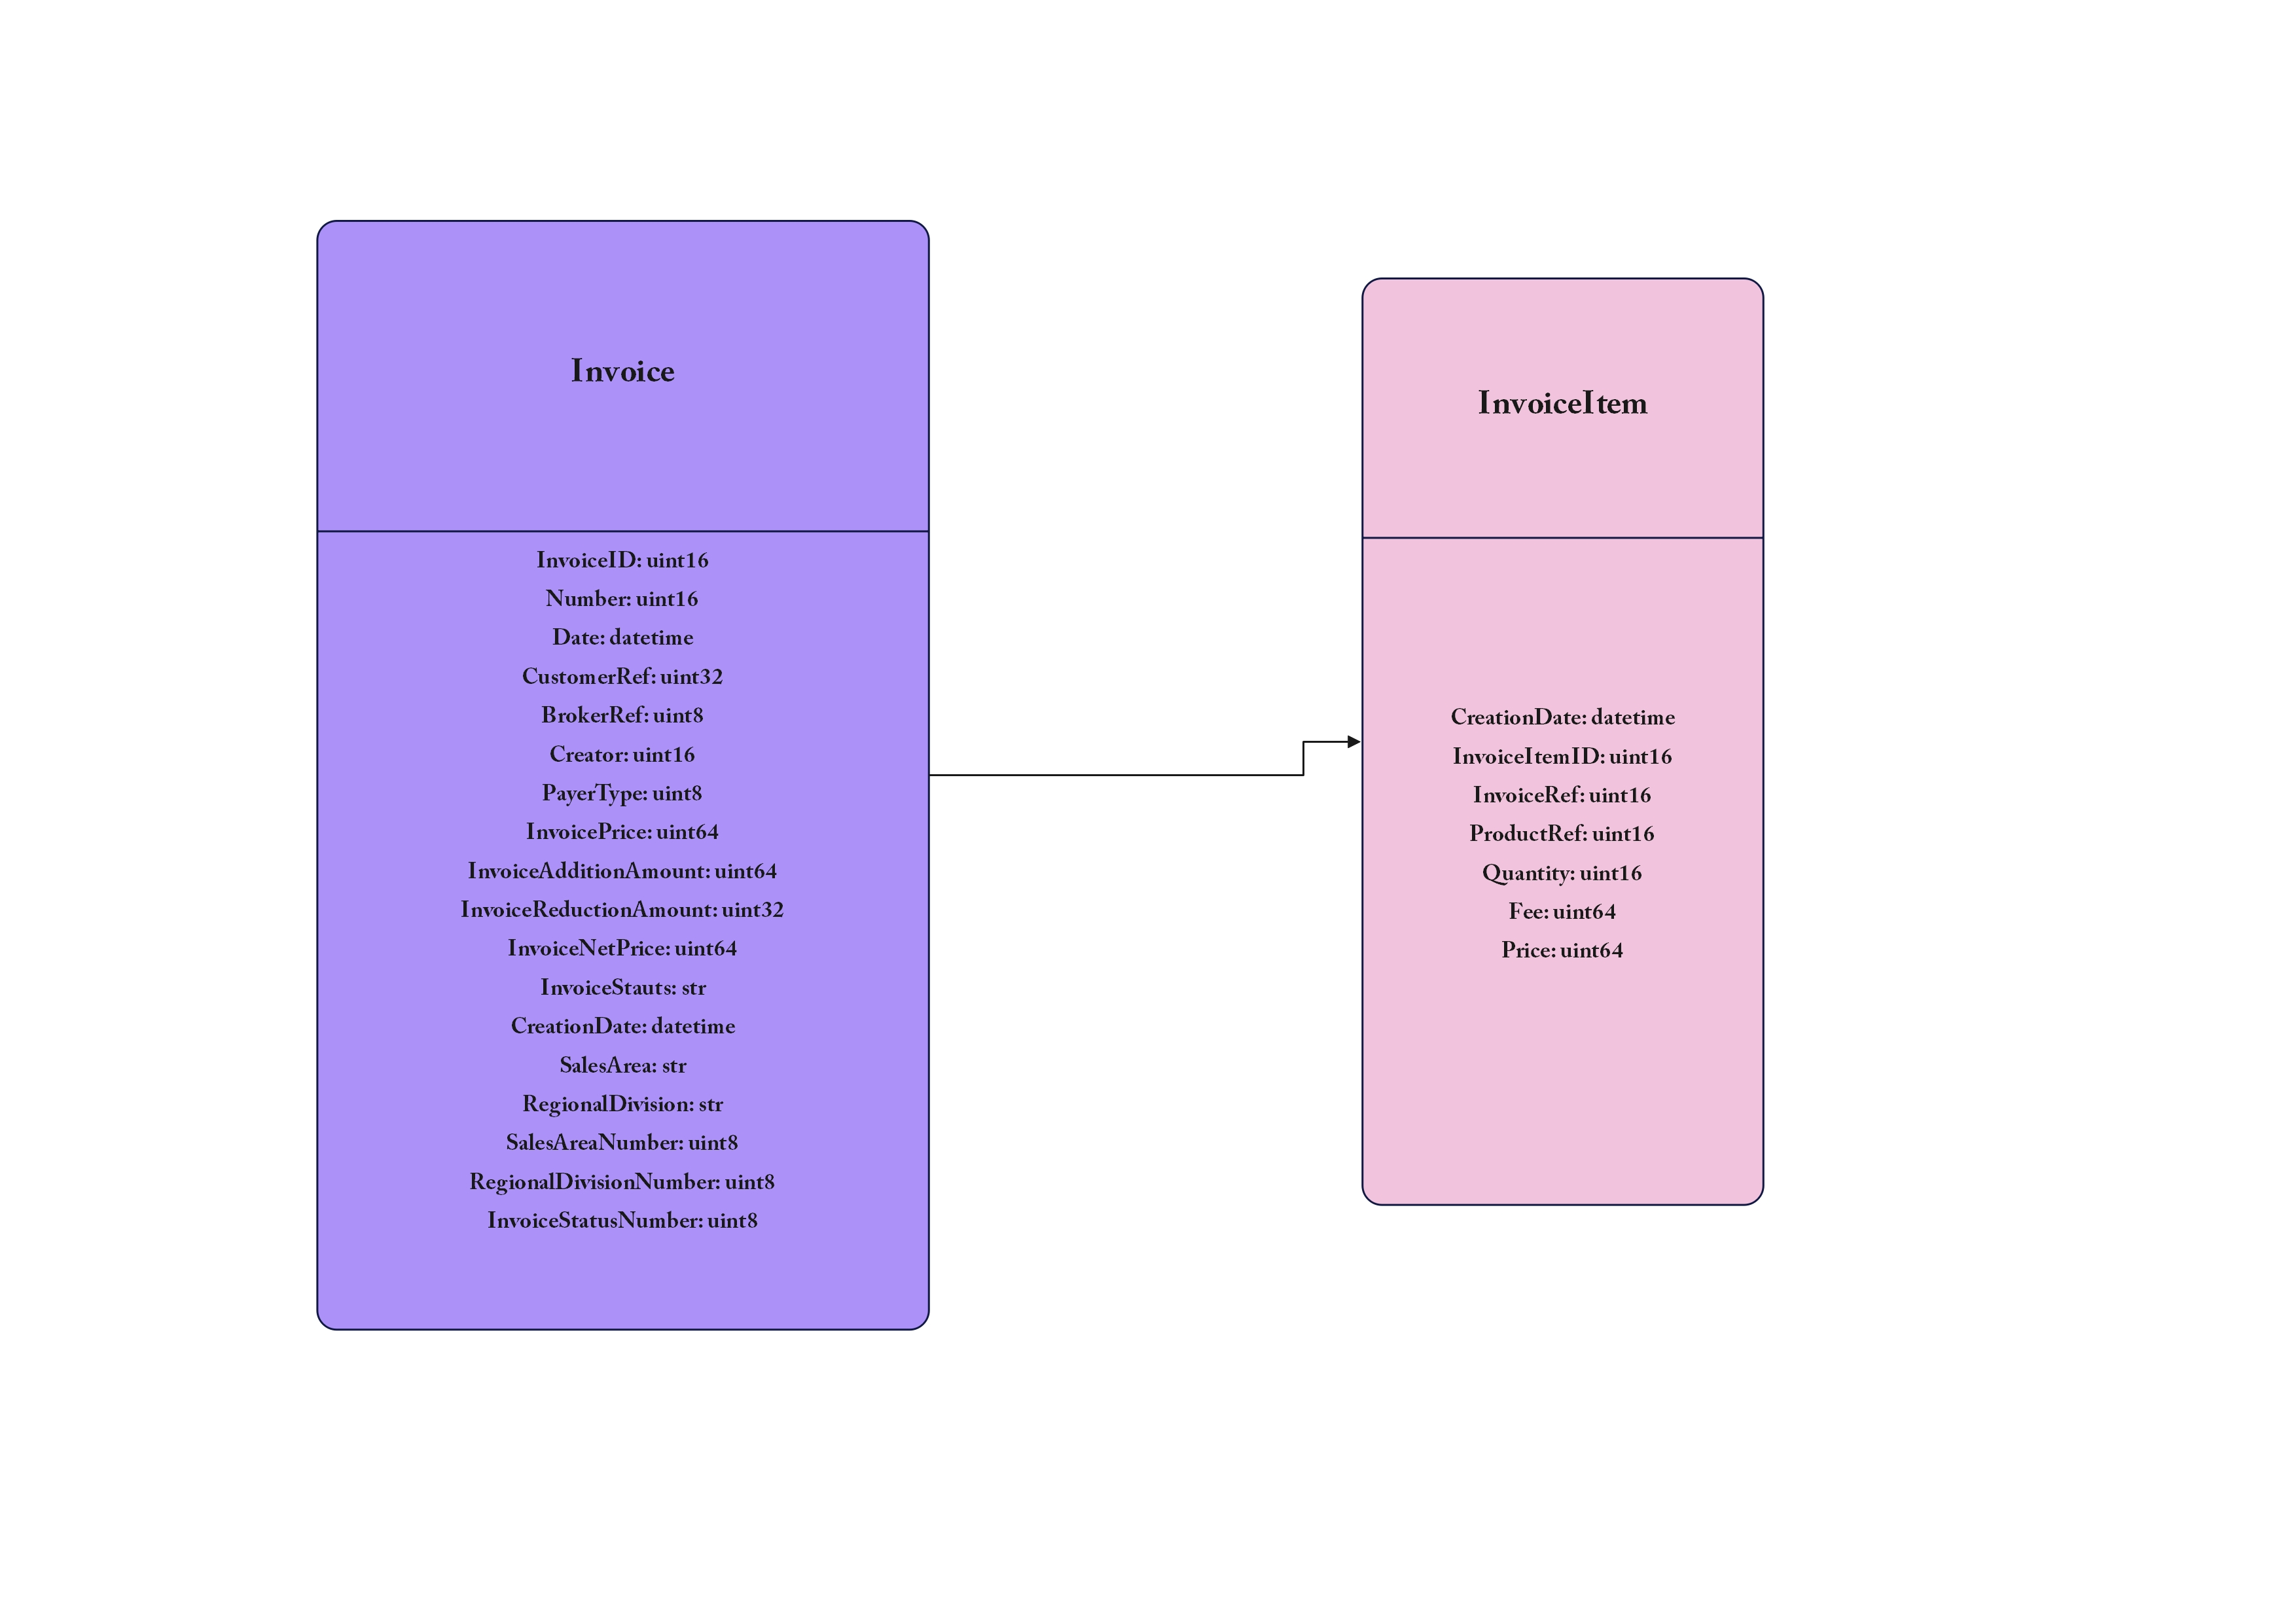

In [164]:
from IPython.display import Image
Image(filename='UML.jpg')


In [165]:
invoice_columns = [
    'InvoiceID',
    'Number',
    'Date',
    'CustomerRef',
    'BrokerRef',
    'Creator',
    'PayerType',
    'InvoicePrice',
    'InvoiceAdditionAmount',
    'InvoiceReductionAmount',
    'InvoiceNetPrice',
    'InvoiceStauts',
    'CreationDate',
    'SalesArea',
    'RegionalDivision',
    'SalesAreaNumber',
    'RegionalDivisionNumber',
    'InvoiceStatusNumber'
]

df_invoice = df[invoice_columns].drop_duplicates(subset='InvoiceID')

invoice_item_columns = [
    'InvoiceItemID',
    'InvoiceRef',   
    'ProductRef',
    'Quantity',
    'Fee',
    'Price',
    'CreationDate'
]

df_invoice_items = df[invoice_item_columns]

df_invoice.to_csv('invoice.csv', index=False)
df_invoice_items.to_csv('invoice_items.csv', index=False)




In [166]:
Invoice = pd.read_csv('invoice.csv')
Invoice

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,InvoiceNetPrice,InvoiceStauts,CreationDate,SalesArea,RegionalDivision,SalesAreaNumber,RegionalDivisionNumber,InvoiceStatusNumber
0,62,26155,2022-02-06,5,1,8959,1,95000000,8550000,0,103550000,Registred by Accounting,2022-02-27 16:51:59.880,تک فروشی,بروجرد,0,18,1
1,64,26169,2022-03-02,18806,3,8947,1,17500000000,1575000000,0,19075000000,Registred by Accounting,2022-03-02 08:23:02.367,تک فروشی,تهران,0,29,1
2,67,26167,2022-02-22,13704,3,8947,1,20000000,1800000,0,21800000,Registred by Accounting,2022-03-02 08:50:21.620,تک فروشی,تهران,0,29,1
3,74,26170,2022-03-02,128,4,8974,1,26184800000,2356632000,0,28541432000,Registred by Accounting,2022-03-02 16:08:37.687,تک فروشی,تهران,0,29,1
4,75,26171,2022-03-05,21,1,8959,1,100000000,9000000,0,109000000,Registred by Accounting,2022-03-05 12:30:37.883,تک فروشی,مریوان,0,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,5166,27956,2025-03-17,94405,12,9012,1,63449000001,6344900000,0,69793900001,Registred by Accounting,2025-03-17 11:10:12.910,تک فروشی,تهران,0,29,1
3611,5167,27957,2025-03-17,14277,1,8959,1,429500000,42950000,0,472450000,Registred by Accounting,2025-03-17 12:30:33.607,نمایندگان,سمنان,3,46,1
3612,5168,27958,2025-03-17,15205,1,8959,1,1948800000,194880000,0,2143680000,Registred by Accounting,2025-03-17 12:32:39.933,نمایندگان,بیرجند,3,26,1
3613,5171,27960,2025-03-17,16039,4,8974,1,500000000,50000000,0,550000000,Registred by Accounting,2025-03-17 14:50:10.017,تک فروشی,تهران,0,29,1


In [167]:
InvoiceItem = pd.read_csv('invoice_items.csv')
InvoiceItem

,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,CreationDate
0,191,62,613,1,95000000,95000000,2022-02-27 16:51:59.880
1,191,62,613,1,95000000,95000000,2022-02-27 16:51:59.880
2,196,64,937,4,4375000000,17500000000,2022-03-02 08:23:02.367
3,196,64,937,4,4375000000,17500000000,2022-03-02 08:23:02.367
4,203,67,22545,1,20000000,20000000,2022-03-02 08:50:21.620
...,...,...,...,...,...,...,...
16803,45748,5173,48931,200,1400000,280000000,2025-03-11 09:23:08.820
16804,45749,5173,49314,1,620000000,620000000,2025-03-11 09:23:08.820
16805,45749,5173,49314,1,620000000,620000000,2025-03-11 09:23:08.820
16806,45750,5173,49315,1,20000000,20000000,2025-03-11 09:23:08.820
